In [ ]:
import numpy as np
import pandas as pd
import utils

import matplotlib.pyplot as plt 
import seaborn as sns
import seaborn.objects as so
# import plotnine as pn
from plotnine import *

 

In [ ]:
import importlib
importlib.reload(utils)


In [ ]:
fn = utils.path_data / 'ana_three_dot_predicting_individual_beh_profile/prediction.csv'
df = pd.read_csv(fn)
df['accuracy'] = df['accuracy']=='correct'

In [ ]:
predVar = 'auc_pred_accuracy'
df_ = df.copy()
df_ = df_.melt(['participant', 'actual control', 'angular bias', 'group'], ['accuracy', predVar], 
               var_name='acc_type',
               value_name='acc')
df_ = df_.groupby(['participant', 'actual control', 'angular bias', 'group', 'acc_type']).mean()
df_ = df_.reset_index() 

In [31]:
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')
df_2 = df_.copy()
# df_2['condition'] = df_2['actual control'] + "_" + df_2['angular bias']
df_2['condition'] = df_2['angular bias'] + "_" + df_2['actual control'] 
df_2['pp'] = df_2['participant'] + "_" + df_2['acc_type']
df_2['pc'] = df_2['participant'] + "_" + df_2['condition']
# df_2.sort_values(by=['actual control', 'angular bias'], inplace=True)
df_2.sort_values(by=['angular bias', 'actual control'], inplace=True)

# df_2['condition'] = pd.Categorical(df_2['condition'], categories=df_2['condition'])
df_2.reset_index(drop=True, inplace=True)
df_2 = df_2.query('group == "H"')


df_2.head()

,participant,actual control,angular bias,group,acc_type,acc,condition,pp,pc
0,K-Reg-H-10,0.3,0,H,accuracy,0.3,0_0.3,K-Reg-H-10_accuracy,K-Reg-H-10_0_0.3
1,K-Reg-H-10,0.3,0,H,auc_pred_accuracy,0.4,0_0.3,K-Reg-H-10_auc_pred_accuracy,K-Reg-H-10_0_0.3
2,K-Reg-H-11,0.3,0,H,accuracy,0.7,0_0.3,K-Reg-H-11_accuracy,K-Reg-H-11_0_0.3
3,K-Reg-H-11,0.3,0,H,auc_pred_accuracy,0.6,0_0.3,K-Reg-H-11_auc_pred_accuracy,K-Reg-H-11_0_0.3
4,K-Reg-H-12,0.3,0,H,accuracy,0.1,0_0.3,K-Reg-H-12_accuracy,K-Reg-H-12_0_0.3


/home/acercyc/anaconda3/envs/py310/lib/python3.10/site-packages/plotnine/scales/scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


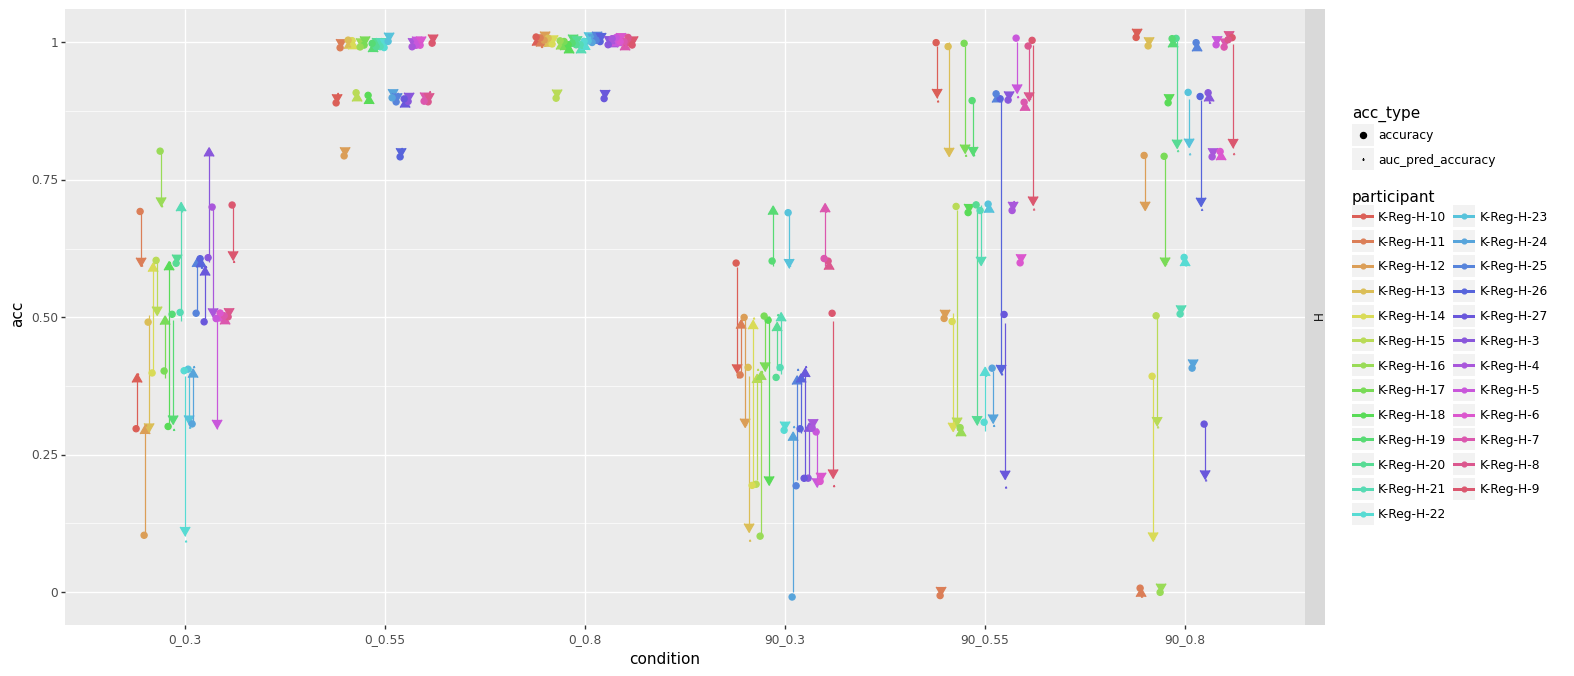

<ggplot: (8760644536978)>

In [50]:
(
    ggplot(df_2, aes(x='condition', y='acc'))
    # + geom_line(aes(linetype='acc_type', color='participant', group='pp', size='acc_type'), alpha=1, position = position_jitterdodge(0, 0.1, 0.5, random_state=0))
    + geom_line(aes(color='participant', group='pc'), position = position_jitterdodge(0, 0.01, 0.5, random_state=0), arrow=arrow(length=0.1, type='close'))
    # + scale_size_manual([1, 0.5])
    + geom_point(aes(color='participant', group='pp', shape='acc_type', size='acc_type'), alpha=1, position = position_jitterdodge(0, 0.01, 0.5, random_state=0))
    + scale_size_discrete(range=[2, 0])
    # + scale_shape_manual(['.', 'o'])
    + facet_grid('group~.')
    + theme(figure_size=(16, 8)) 
    # + geom_point()
    # + pn.scale_color_brewer('spectral') 
)


In [ ]:
(
    ggplot(df_2, aes(x='condition', y='acc'))
    # + geom_line(aes(linetype='acc_type', color='participant', group='pp', size='acc_type'), alpha=0.5, position = position_jitterdodge(0.01, 0.05, random_state=0))
    + scale_size_manual([1, 0.5])
    + geom_point(aes(color='participant', group='pp', shape='acc_type'), alpha=0.5, position = position_jitterdodge(0.01, 0.05, random_state=0))
    + scale_shape_manual(['.', 'o'])
    + facet_grid('group~.')
    + theme(figure_size=(8, 8)) 
    # + geom_point()
    # + pn.scale_color_brewer('spectral') 
)


In [ ]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']

g = (
    so.Plot(df_, x='acc_type', y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='acc_type', fill='acc_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(6, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)

print(g)
fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
g.save(fn)


In [ ]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

df_2 = df_.copy()

df_2['condition'] = df_2['actual control'] + "_" + df_2['angular bias']
df_2.sort_values(by=['angular bias', 'actual control'], inplace=True)
# df_2.sort_values(by=['condition'], inplace=True)

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']
sns.set_palette('icefire') #color_palette("icefire", as_cmap=True)
g = (
    so.Plot(df_2, x='condition', y='acc', color='participant',  linestyle='acc_type')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Lines(alpha=0.2),  so.Jitter(x=.05, y=.05), group="participant", legend=False)
    # .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group")
    .layout(size=(10, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)
g


In [ ]:

# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']

g = (
    so.Plot(df_, x='acc_type', y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    # .pair(x=["actual control", 'angular bias'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='.'), so.Agg(),  so.Dodge(), so.Jitter(x=0, y=0), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Bar(), so.Agg(), so.Dodge())

    # .add(so.Dot(pointsize=10), so.Agg(), so.Dodge(), marker='acc_type')
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .facet(row="group", col='actual control')
    .layout(size=(10, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
  
)
g
# print(g)
# fn = utils.Save.savepath('report_three_dot_prediction_group', 'real_pred_group_performce.pdf')
# g.save(fn)


In [ ]:
# f = plt.figure(figsize=(10, 5))
# df_['angular bias'] = pd.Categorical(df_['angular bias'])
df_['angular bias'] = df_['angular bias'].astype('str')
df_['actual control'] = df_['actual control'].astype('str')

gap = 0.1
byVar = ['acc', 'actual control', 'angular bias', 'acc_type']
(
    so.Plot(df_, y='acc', color='angular bias')
    # .add(so.Dots(alpha=0.2), so.Jitter(x=.05, y=.05))
    .pair(x=["actual control", 'acc_type'])
    # .facet(row="group")    
    .add(so.Line(alpha=0.2, marker='o'), so.Agg(), so.Jitter(x=.05, y=.05), group="participant")
    # .add(so.Range(), so.Est(errorbar="se"))
    .add(so.Dot(pointsize=10), so.Agg(), so.Dodge())
    .add(so.Range(), so.Est(errorbar="se"), so.Dodge())
    .add(so.Line(alpha=0.2, marker=''), group="participant")
    .facet(row="group")
    .layout(size=(10, 10))
    .limit(y=(-0.1, 1.1))
    # .on(f)
    
)